Work in progress

In [1]:
import sys
sys.path.append('../../qick/qick_lib/')
sys.path.append('../soft/')
import Scan
from mkids import *
import matplotlib.pyplot as plt


In [2]:
board = Scan.getBoard()
if board == 'zcu111':
    bitfile = 'mkids_2x2_kidsim_v1'    
elif board == 'zcu216':
    bitfile = 'mkids_2x2_kidsim_v2'
elif board == 'rfsoc4x2':
    bitfile = 'mkids_v3'
else:
    raise Exception("Do not know what to do with %s"%board)

iKids = 0
iSimu = 0
scan = Scan.Scan(bitfile, iKids=iKids, iSimu=iSimu)

In [3]:
# Set the mixers so the channel is in the middle of the first nyquist zone.
# Note that the Scan object has the field "fNyquist" which will be set correctly for each board and firmware.

fMixerKids = scan.fNyquist/2
scan.set_mixer(fMixerKids) # Sets the mixer for both the kids and the simu chains
print("fNyquist = ",scan.fNyquist)

fNyquist =  1228.8


In [4]:
# Initialize simulation chain with no resonance
simu = scan.simuChain
simu.analysis.qout(3)
simu.synthesis.qout(3)
simu.alloff()


In [5]:
# Initialize the kids chain
kids = scan.kidsChain
# These values for qout work reasonably for loopback.  
kids.analysis.qout(2)
kids.synthesis.qout(2)


In [6]:
ch0 = scan.nOutCh//4 # Pick a channel 

In [7]:
outCh = [ch0]
fTones = np.array(scan.outCh2Freq(outCh))
fis = np.random.default_rng().uniform(0, 2*np.pi, 1000)
gs = 0.9*np.ones(len(fTones))/len(fTones)
cgs = None
bandwidth = 0.3 #scan.dfChannel
nf = 50
xs = scan.sweep_tones(fTones, fis, gs, cgs, bandwidth, nf, doApplyDelay=False)
f,x = Scan.sweptTonesToSpectrum(xs, fTones, scan.kidsChain.scanFOffsets)

  0%|          | 0/50 [00:00<?, ?it/s]

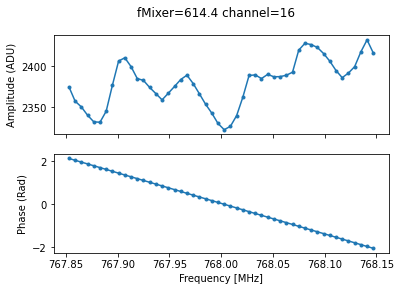

In [8]:

Scan.bodePlot(f,x, "fMixer=%.1f channel=%d"%(fMixerKids, ch0))

In [9]:
print(scan.kidsChain.synthesis.dict['chain']['fs'])
print(scan.soc['dual'][0]['synthesis']['fs'])
print(scan.pfbFs)
print(scan.kidsChain.synthesis.fc_ch)
print(scan.dfChannel)

614.4
614.4
614.4
9.6
9.6


  0%|          | 0/50 [00:00<?, ?it/s]

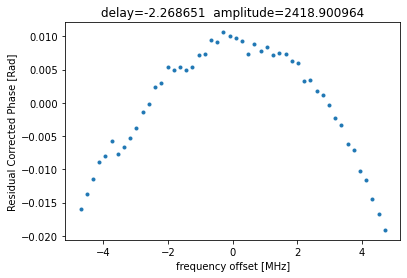

In [10]:
delay,xs,fOffsets,fTone,phi0 = scan.getDelayForOutCh(ch0, df=scan.dfChannel, N=50, doProgress=True, plotFit=True)


  0%|          | 0/50 [00:00<?, ?it/s]

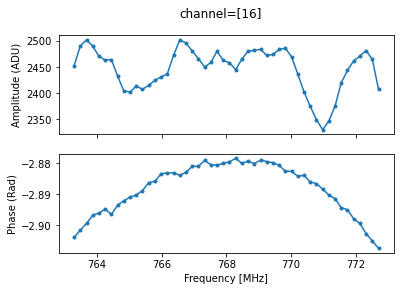

In [11]:
iCh = ch0
outCh = [iCh]
fTones = np.array(scan.outCh2Freq(outCh))
fis = np.random.default_rng().uniform(0, 2*np.pi, 1000)
gs = 0.9*np.ones(len(fTones))/len(fTones)
cgs = None
bandwidth = scan.dfChannel
nf = 50
xs = scan.sweep_tones(fTones, fis, gs, cgs, bandwidth, nf, doApplyDelay=False)
xsc = applyDelay(fTones, scan.kidsChain.scanFOffsets, xs, delay)
f,x = Scan.sweptTonesToSpectrum(xsc, fTones, scan.kidsChain.scanFOffsets)
Scan.bodePlot(f,x, "channel=%s"%(outCh))

  0%|          | 0/50 [00:00<?, ?it/s]

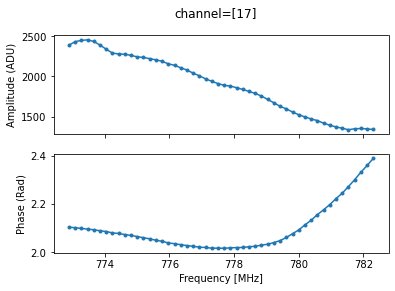

In [12]:
iCh = ch0+1
outCh = [iCh]
fTones = np.array(scan.outCh2Freq(outCh))
fis = np.random.default_rng().uniform(0, 2*np.pi, 1000)
gs = 0.9*np.ones(len(fTones))/len(fTones)
cgs = None
bandwidth = scan.dfChannel
nf = 50
xs = scan.sweep_tones(fTones, fis, gs, cgs, bandwidth, nf, doApplyDelay=False)
xsc = applyDelay(fTones, scan.kidsChain.scanFOffsets, xs, delay)
f,x = Scan.sweptTonesToSpectrum(xsc, fTones, scan.kidsChain.scanFOffsets)
Scan.bodePlot(f,x, "channel=%s"%(outCh))

  0%|          | 0/50 [00:00<?, ?it/s]

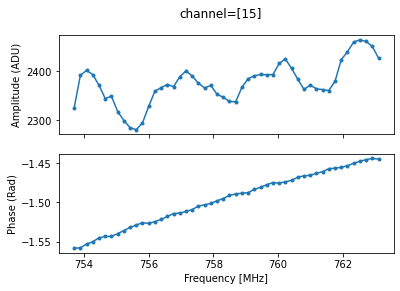

In [13]:
iCh = ch0-1
outCh = [iCh]
fTones = np.array(scan.outCh2Freq(outCh))
fis = np.random.default_rng().uniform(0, 2*np.pi, 1000)
gs = 0.9*np.ones(len(fTones))/len(fTones)
cgs = None
bandwidth = scan.dfChannel
nf = 50
xs = scan.sweep_tones(fTones, fis, gs, cgs, bandwidth, nf, doApplyDelay=False)
xsc = applyDelay(fTones, scan.kidsChain.scanFOffsets, xs, delay)
f,x = Scan.sweptTonesToSpectrum(xsc, fTones, scan.kidsChain.scanFOffsets)
Scan.bodePlot(f,x, "channel=%s"%(outCh))


  0%|          | 0/50 [00:00<?, ?it/s]

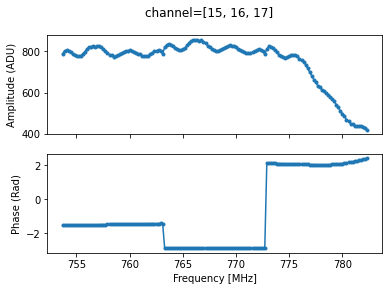

In [14]:
outCh = [ch0-1, ch0, ch0+1]
fTones = np.array(scan.outCh2Freq(outCh))
fis = np.random.default_rng().uniform(0, 2*np.pi, 1000)
gs = 0.9*np.ones(len(fTones))/len(fTones)
cgs = None
bandwidth = scan.dfChannel
nf = 50
xs = scan.sweep_tones(fTones, fis, gs, cgs, bandwidth, nf, doApplyDelay=False)
xsc = applyDelay(fTones, scan.kidsChain.scanFOffsets, xs, delay)
f,x = Scan.sweptTonesToSpectrum(xsc, fTones, scan.kidsChain.scanFOffsets)
Scan.bodePlot(f,x, "channel=%s"%(outCh))


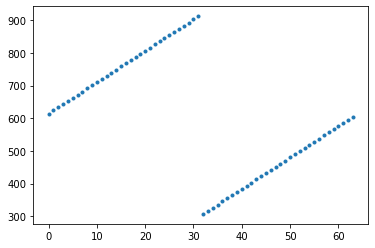

In [15]:
inChs = np.arange(scan.nInCh)
fIns = scan.inCh2Freq(inChs)
plt.plot(inChs, fIns, '.')

In [16]:
# Exclude the "two middle" channels so we can scan over the full bandwidth of the channels
inds = np.ones(scan.nInCh, dtype=bool)
inds[scan.nInCh//2] = False
inds[scan.nInCh//2+1] = False


In [17]:
kids.analysis.qout(2)
kids.synthesis.qout(2)
fTones = np.array(scan.outCh2Freq(inChs[inds]))
fis = np.random.default_rng().uniform(0, 2*np.pi, 1000)
gs = 0.9*np.ones(len(fTones))/len(fTones)
cgs = None
bandwidth = scan.dfChannel
nf = 250
xs = scan.sweep_tones(fTones, fis, gs, cgs, bandwidth, nf, doApplyDelay=False)
xsc = Scan.applyDelay(fTones, scan.kidsChain.scanFOffsets, xs, delay)
f,x = Scan.sweptTonesToSpectrum(xsc, fTones, scan.kidsChain.scanFOffsets)


  0%|          | 0/250 [00:00<?, ?it/s]

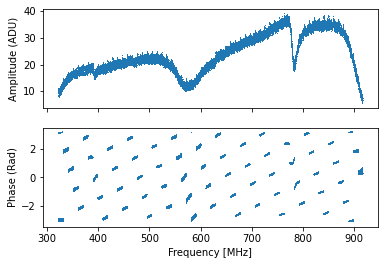

In [18]:
Scan.bodePlot(f,x, plotFmt=',')

In [19]:
# Change qout to get more signal out
kids.analysis.qout(0)
kids.synthesis.qout(0)
fTones = np.array(scan.outCh2Freq(inChs[inds]))
fis = np.random.default_rng().uniform(0, 2*np.pi, 1000)
gs = 0.9*np.ones(len(fTones))/len(fTones)
cgs = None
bandwidth = scan.dfChannel
nf = 250
xs = scan.sweep_tones(fTones, fis, gs, cgs, bandwidth, nf, doApplyDelay=False, nRepeats=2)
xsc = Scan.applyDelay(fTones, scan.kidsChain.scanFOffsets, xs, delay)
f,x = Scan.sweptTonesToSpectrum(xsc, fTones, scan.kidsChain.scanFOffsets)

  0%|          | 0/250 [00:00<?, ?it/s]

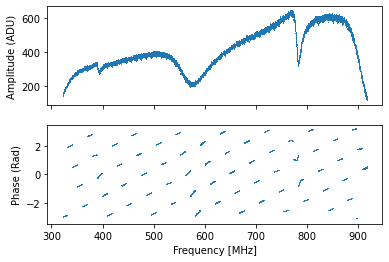

Text(0, 0.5, 'phase')

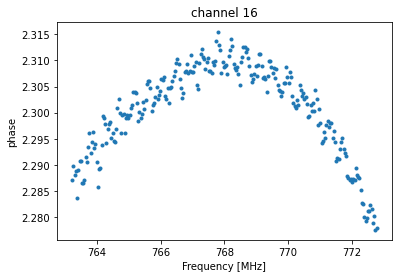

In [20]:
Scan.bodePlot(f,x, plotFmt=',')
plt.show()
inChsTemp = scan.inFreq2ch(f)
indsTemp = inChsTemp == ch0
plt.plot(f[indsTemp], np.angle(x[indsTemp]), '.')
plt.title("channel %s"%str(ch0))
plt.xlabel("Frequency [MHz]")
plt.ylabel("phase")

In [21]:
# This is the calibration run.  Set nRepeats large enough to reduce statistics so interpolation makes sense.
# This will take a while
kids.analysis.qout(0)
kids.synthesis.qout(0)
fTones = np.array(scan.outCh2Freq(inChs[inds]))
fis = np.random.default_rng().uniform(0, 2*np.pi, 1000)
gs = 0.9*np.ones(len(fTones))/len(fTones)
cgs = None
bandwidth = scan.dfChannel
nf = 250
nRepeats = 50
nRepeats = 2
xsCalibrationData = scan.sweep_tones(fTones, fis, gs, cgs, bandwidth, nf, doApplyDelay=False, nRepeats=nRepeats)

  0%|          | 0/250 [00:00<?, ?it/s]

In [22]:
print(xsCalibrationData.shape) # nf, ntone
print(nf, len(fTones))

(250, 62)
250 62


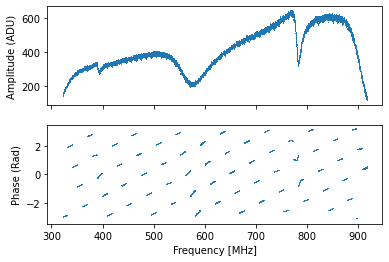

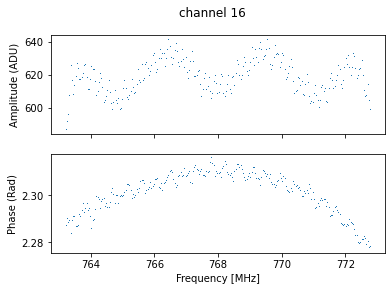

In [23]:
xsCalibrationDataDelay = Scan.applyDelay(fTones, scan.kidsChain.scanFOffsets, xsCalibrationData, delay)
fCal,xCal = Scan.sweptTonesToSpectrum(xsCalibrationDataDelay, fTones, scan.kidsChain.scanFOffsets)
Scan.bodePlot(f,x, plotFmt=',')
plt.show()
inChsTemp = scan.inFreq2ch(f)
indsTemp = inChsTemp == ch0
#plt.plot(f[indsTemp], np.angle(x[indsTemp]), '.')
Scan.bodePlot(f[indsTemp], x[indsTemp], supTitle="channel %d"%ch0, plotFmt=',')


In [24]:
np.savez(file="calib-2",fMixer=fMixerKids, fTones=fTones, delay=delay, xs=xsCalibrationDataDelay, scanFOffsets=scan.kidsChain.scanFOffsets)

In [25]:
npzfile = np.load("calib-2.npz")

In [26]:
npzfile['fMixer']

array(614.4)

In [27]:
print(npzfile['xs'].shape)
print(npzfile['fTones'].shape)

(250, 62)
(62,)


In [28]:
# Disable all resonators.
fResonance0 = 450
simu.alloff()
simu.enable(fResonance0)
# Set quantization.
simu.analysis.qout(0)
simu.synthesis.qout(0)


  0%|          | 0/10 [00:00<?, ?it/s]

(620,)


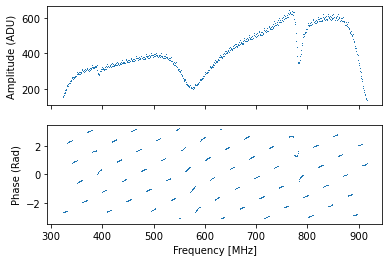

In [29]:
kids.analysis.qout(0)
kids.synthesis.qout(0)
fTones = np.array(scan.outCh2Freq(inChs[inds]))
fis = np.random.default_rng().uniform(0, 2*np.pi, 1000)
gs = 0.9*np.ones(len(fTones))/len(fTones)
cgs = None
bandwidth = scan.dfChannel
nf = 10
xs = scan.sweep_tones(fTones, fis, gs, cgs, bandwidth, nf, doApplyDelay=False, nRepeats=2)
xsc = Scan.applyDelay(fTones, scan.kidsChain.scanFOffsets, xs, delay)
f,x = Scan.sweptTonesToSpectrum(xsc, fTones, scan.kidsChain.scanFOffsets)
Scan.bodePlot(f,x, plotFmt=',')
print(f.shape)

In [30]:
print(xs.shape)
print(npzfile['xs'].shape)

(10, 62)
(250, 62)


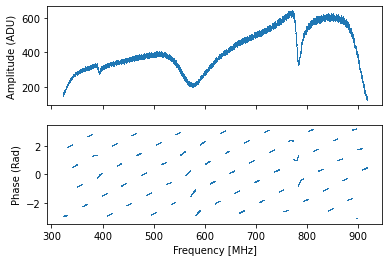

In [31]:

#xsCalDelay = Scan.applyDelay(fTones,npzfile['scanFOffsets'], npzfile['xs'], delay)
fCal, xCal = Scan.sweptTonesToSpectrum(npzfile['xs'], fTones, npzfile['scanFOffsets'])
Scan.bodePlot(fCal, xCal, plotFmt=',')

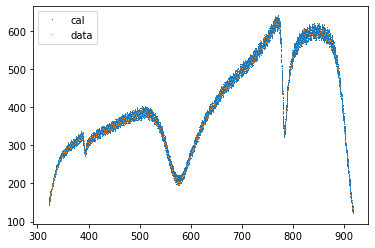

In [32]:
plt.plot(fCal, np.abs(xCal), ',', label="cal")
plt.plot(f,np.abs(x), ',', label="data")
plt.legend()

In [33]:
a = np.array([10 + 1j*12])
print(a)
b = a/2
print(b)

[10.+12.j]
[5.+6.j]


25
(620,)
(15500,)
403.17040205825526


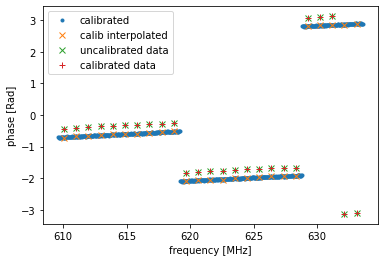

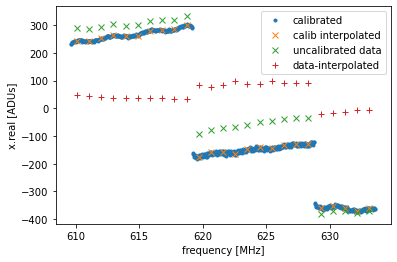

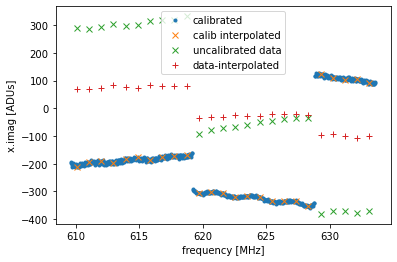

In [34]:
def applyCalibration(f,x,fCal,xCal):
    iTemp = len(fCal)//len(f)
    print(iTemp)
    print(f.shape)
    #print(x.shape)
    print(fCal.shape) 
    #print(xCal.shape)
    xCalAmplitude = np.abs(xCal).mean()
    print(xCalAmplitude)
    inds = np.argsort(fCal)
    xInterp = np.interp(f, fCal[inds], np.real(xCal[inds])) + 1j*np.interp(f, fCal[inds], np.imag(xCal[inds]))
    xCalib = (xCalAmplitude * x / np.abs(xInterp)) 
    
    #xCalib *= np.exp(1j*2*np.pi*(np.angle(xCalib)-np.angle(xInterp)))
    n = 25

    
    plt.plot(fCal[:iTemp*n], np.angle(xCal[:iTemp*n]), '.', label="calibrated")
    plt.plot(f[:n], np.angle(xInterp[:n]), 'x', label="calib interpolated")
    plt.plot(f[:n], np.angle(x[:n]), 'x', label="uncalibrated data")
    plt.plot(f[:n], np.angle(xCalib[:n]), '+', label="calibrated data")
    plt.legend()
    plt.xlabel("frequency [MHz]")
    plt.ylabel("phase [Rad]")
    plt.show()
    plt.plot(fCal[:iTemp*n], np.real(xCal[:iTemp*n]), '.', label="calibrated")
    plt.plot(f[:n], np.real(xInterp[:n]), 'x', label="calib interpolated")
    plt.plot(f[:n], np.real(x[:n]), 'x', label="uncalibrated data")
    plt.plot(f[:n], np.real(x[:n]-xInterp[:n]), '+', label="data-interpolated")
    plt.legend()
    plt.xlabel("frequency [MHz]")
    plt.ylabel("x.real [ADUs]")
    plt.show()
    plt.plot(fCal[:iTemp*n], np.imag(xCal[:iTemp*n]), '.', label="calibrated")
    plt.plot(f[:n], np.imag(xInterp[:n]), 'x', label="calib interpolated")
    plt.plot(f[:n], np.real(x[:n]), 'x', label="uncalibrated data")
    plt.plot(f[:n], np.imag(x[:n]-xInterp[:n]), '+', label="data-interpolated")
    plt.legend()
    plt.xlabel("frequency [MHz]")
    plt.ylabel("x.imag [ADUs]")
    plt.show()
    
    return xCalib
xCalibrated = applyCalibration(f,x,fCal,xCal)   

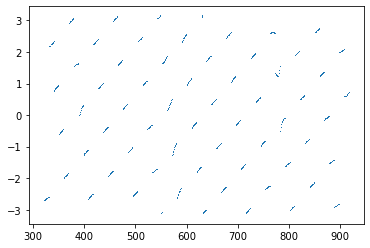

In [35]:
plt.plot(f,np.angle(xCalibrated), ',')

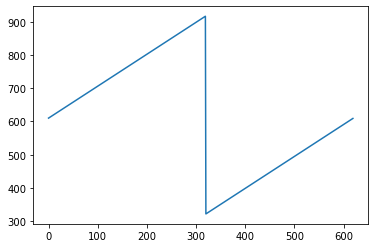

In [36]:
plt.plot(f)

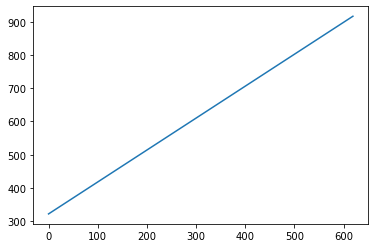

In [37]:
inds = np.argsort(f)
plt.plot(f[inds])

In [38]:
np.argsort?

Signature: np.argsort(a, axis=-1, kind=None, order=None)
Docstring:
Returns the indices that would sort an array.

Perform an indirect sort along the given axis using the algorithm specified
by the `kind` keyword. It returns an array of indices of the same shape as
`a` that index data along the given axis in sorted order.

Parameters
----------
a : array_like
    Array to sort.
axis : int or None, optional
    Axis along which to sort.  The default is -1 (the last axis). If None,
    the flattened array is used.
kind : {'quicksort', 'mergesort', 'heapsort', 'stable'}, optional
    Sorting algorithm. The default is 'quicksort'. Note that both 'stable'
    and 'mergesort' use timsort under the covers and, in general, the
    actual implementation will vary with data type. The 'mergesort' option
    is retained for backwards compatibility.

    .. versionchanged:: 1.15.0.
       The 'stable' option was added.
order : str or list of str, optional
    When `a` is an array with fields define

In [39]:
np.interp?

Signature: np.interp(x, xp, fp, left=None, right=None, period=None)
Docstring:
One-dimensional linear interpolation for monotonically increasing sample points.

Returns the one-dimensional piecewise linear interpolant to a function
with given discrete data points (`xp`, `fp`), evaluated at `x`.

Parameters
----------
x : array_like
    The x-coordinates at which to evaluate the interpolated values.

xp : 1-D sequence of floats
    The x-coordinates of the data points, must be increasing if argument
    `period` is not specified. Otherwise, `xp` is internally sorted after
    normalizing the periodic boundaries with ``xp = xp % period``.

fp : 1-D sequence of float or complex
    The y-coordinates of the data points, same length as `xp`.

left : optional float or complex corresponding to fp
    Value to return for `x < xp[0]`, default is `fp[0]`.

right : optional float or complex corresponding to fp
    Value to return for `x > xp[-1]`, default is `fp[-1]`.

period : None or float, opt

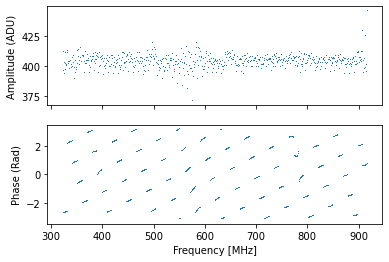

In [40]:
Scan.bodePlot(f,xCalibrated, plotFmt=',')